# **Recopilación de datos.**
La recopilación de datos es una etapa fundamental en la construcción de cualquier modelo de predicción. En este notebook, aplicaremos técnicas para **limpiar y preparar el dataset** antes de su uso en el modelado y evaluación en el análisis exploratorio (EDA). Identificaremos la presencia de **valores nulos, datos duplicados, variables categóricas y valores atípicos**:
- **Manejo de valores nulos** mediante eliminación o imputación.
- **Eliminación de duplicados** para evitar sesgos en el modelo.
- **Conversión y corrección de tipos de datos** para garantizar coherencia.

## **Importación de librerías.**
Se cargan las librerías necesarias (incluidas en el archivo `requirements.txt`) para trabajar con manipulación de datos y archivos.

In [67]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## **Importación e información de Dataframes.**

In [68]:
df = pd.read_csv('../data/raw/MONGO00_All.csv', index_col=0, decimal=',')
df.head()

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094
P1000003,90.92,203.97,121.79,12.95,8.56,245.11,1.26,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1695.42,450,1,0,Temporal,1,1,1,Baja,0,78,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,55575
P1000004,69.17,154.33,78.34,12.34,8.20,234.44,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1709.51,150,1,0,Temporal,1,1,1,Moderada,1,38,F,Soltero,Posgrado,Autónomo,Norte,Chile,20826


In [69]:
df.shape

(50000, 39)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, P1000000 to P1049999
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   glucosa              50000 non-null  float64
 1   colesterol           50000 non-null  float64
 2   trigliceridos        50000 non-null  float64
 3   hemoglobina          50000 non-null  float64
 4   leucocitos           50000 non-null  float64
 5   plaquetas            50000 non-null  float64
 6   creatinina           50000 non-null  float64
 7   diabetes             50000 non-null  int64  
 8   hipertension         50000 non-null  int64  
 9   obesidad             50000 non-null  int64  
 10  cancer               50000 non-null  int64  
 11  enfermedad_cardiaca  50000 non-null  int64  
 12  asma                 50000 non-null  int64  
 13  epoc                 50000 non-null  int64  
 14  mut_BRCA1            50000 non-null  int64  
 15  mut_TP53             50000 non-

In [71]:
df.columns

Index(['glucosa', 'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina', 'diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'asma', 'epoc', 'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS', 'mut_PIK3CA', 'mut_ALK', 'mut_BRAF', 'ingresos_mensuales', 'gastos_salud', 'seguro_salud', 'deudas', 'tipo_empleo', 'ayudas_publicas', 'fumador', 'alcohol', 'actividad_fisica', 'vive', 'edad', 'sexo', 'estado_civil', 'nivel_educativo', 'ocupacion', 'region', 'pais_nacimiento', 'codigo_postal'], dtype='object')

El presente modelo de red neuronal tiene como objetivo **predecir la probabilidad de supervivencia** de un paciente (`vive = 1`) en base a un conjunto heterogéneo de variables clínicas, genéticas, socioeconómicas y demográficas. Cada grupo de variables aporta información complementaria que puede ser determinante para identificar patrones de riesgo. A continuación se describe el propósito específico de cada conjunto de variables dentro del modelo:
1. **Variables bioquímicas:** Estas variables reflejan el estado fisiológico y metabólico del paciente en el momento del análisis. Son esenciales para evaluar alteraciones funcionales que pueden estar asociadas a condiciones críticas.
    - `glucosa`, `colesterol`, `trigliceridos`: indicadores metabólicos relacionados con riesgo cardiovascular y complicaciones sistémicas.
    - `hemoglobina`, `leucocitos`, `plaquetas`: marcadores hematológicos clave para detectar anemia, infecciones o problemas inmunológicos.
    - `creatinina`: medida de función renal, importante en pacientes crónicos o polimedicados.

    Estas variables deben ser tratadas como **predictoras continuas**, y **normalizadas** antes de introducirse en la red.

2. **Variables clínicas:** Incluyen antecedentes y diagnósticos médicos relevantes, que afectan directamente al pronóstico del paciente.
    - `diabetes`, `hipertension`, `obesidad`, `cancer`, `enfermedad_cardiaca`, `asma`, `epoc`: condiciones clínicas codificadas como binarias (presente/no presente), que influyen significativamente en el riesgo de mortalidad.

    Estas variables actuarán como **factores de riesgo explícitos**, directamente introducibles en el modelo como **variables categóricas binarias**.

3. **Variables genéticas:** Representan la presencia de mutaciones en genes asociados a riesgo oncológico o enfermedades crónicas.
    - `mut_BRCA1`, `mut_TP53`, `mut_EGFR`, `mut_KRAS`, `mut_PIK3CA`, `mut_ALK`, `mut_BRAF`: presencia/ausencia de mutaciones genéticas, todas de tipo binario.

    Se usarán como **indicadores moleculares de susceptibilidad o agresividad clínica**.

4. **Variables socioeconómicas:** Estas variables permiten modelar el **contexto económico del paciente**, lo cual puede condicionar el acceso a cuidados, adherencia al tratamiento o exposición a factores de riesgo.
    - `ingresos_mensuales`: nivel de ingresos del hogar (requiere limpieza y transformación numérica).
    - `gastos_salud`, `deudas`: nivel de carga económica en salud o endeudamiento.
    - `seguro_salud`, `ayudas_publicas`: cobertura de necesidades básicas y acceso a servicios.
    - `tipo_empleo`: nivel de estabilidad laboral o exposición laboral (requiere codificación categórica).

    Estas variables se utilizarán para enriquecer el modelo con información **social y financiera**, relevante en medicina personalizada.

5. **Variables de estilo de vida:** Influyen directamente en el pronóstico, ya que reflejan **conductas de riesgo o factores protectores**.
    - `fumador`, `alcohol`: consumo de sustancias nocivas.
    - `actividad_fisica`: nivel de movilidad o ejercicio, que puede tener un efecto protector.

    Estas variables se integrarán como **predictoras categóricas discretas**, especialmente útiles para ajustar perfiles de riesgo.

6. **Variable objetivo**
    - `vive`: variable binaria que indica si el paciente ha sobrevivido tras un periodo crítico. Esta es la **variable objetivo del modelo** y se utilizará para entrenamiento supervisado.

7. **Variables demográficas y contexto:** Estas variables permiten contextualizar al paciente dentro de su entorno social y cultural, lo que puede afectar directa o indirectamente a su salud.
    - `edad`: variable continua de alta relevancia clínica.
    - `sexo`, `estado_civil`, `nivel_educativo`, `ocupacion`, `region`, `pais_nacimiento`, `codigo_postal`: variables categóricas con posible relación con factores estructurales de salud y mortalidad.

    Se incorporarán al modelo con el objetivo de **detectar patrones diferenciales por perfil poblacional**.



In [72]:
df.head(3)

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094


## **Limpieza de datos.**
Antes de construir una red neuronal, es fundamental asegurarnos de que los datos sean consistentes, completos y libres de errores. En esta sección, abordaremos la gestión de valores nulos y duplicados, dos problemas comunes en los datasets que pueden afectar el rendimiento del modelo y la calidad del análisis.

### **Manejo de filas duplicadas.**
Los datos duplicados pueden sesgar los resultados y generar inconsistencias en el análisis. Aquí revisaremos si existen registros repetidos en el dataset y aplicaremos las estrategias necesarias para eliminarlos sin perder información relevante.

In [73]:
df.duplicated().sum() # Columnas duplicadas

0

In [74]:
df.drop_duplicates(inplace = True)

In [75]:
df.shape[0] # Filas tras eliminar duplicados

50000

### **Manejo de filas nulas.**
Los valores nulos pueden generar problemas en las redes neuronales, especialmente si afectan variables clave. En este análisis, identificaremos las columnas con datos faltantes y aplicaremos estrategias como eliminación o imputación, dependiendo del impacto que puedan tener en el modelo.

In [76]:
df.isnull().sum() # Valores nulos

glucosa                0
colesterol             0
trigliceridos          0
hemoglobina            0
leucocitos             0
plaquetas              0
creatinina             0
diabetes               0
hipertension           0
obesidad               0
cancer                 0
enfermedad_cardiaca    0
asma                   0
epoc                   0
mut_BRCA1              0
mut_TP53               0
mut_EGFR               0
mut_KRAS               0
mut_PIK3CA             0
mut_ALK                0
mut_BRAF               0
ingresos_mensuales     0
gastos_salud           0
seguro_salud           0
deudas                 0
tipo_empleo            0
ayudas_publicas        0
fumador                0
alcohol                0
actividad_fisica       0
vive                   0
edad                   0
sexo                   0
estado_civil           0
nivel_educativo        0
ocupacion              0
region                 0
pais_nacimiento        0
codigo_postal          0
dtype: int64

#### **Errores ortográficos.**
En muchos casos, los datos pueden contener caracteres incorrectos, como símbolos (`-`, `?`, `#`, `*`, etc.), diferencias en mayúsculas y espacios en blanco, lo que puede afectar el análisis y modelado. En esta sección, listamos los valores únicos de cada columna categórica para detectar inconsistencias o entradas incorrectas.

In [77]:
for col in df.select_dtypes(include=['object']).columns:
    print('{} : {}'.format(col,df[col].unique()))

tipo_empleo : ['Público' 'Temporal' 'Desempleado' 'Privado' 'Autónomo']
actividad_fisica : ['Baja' 'Moderada' 'Alta']
sexo : ['F' 'M']
estado_civil : ['Viudo' 'Soltero' 'Divorciado' 'Casado']
nivel_educativo : ['Secundaria' 'Universitaria' 'Primaria' 'Posgrado']
ocupacion : ['Empleado' 'Autónomo' 'Desempleado' 'Jubilado']
region : ['Centro' 'Sur' 'Norte' 'Oeste' 'Este']
pais_nacimiento : ['Indonesia' 'Brazil' 'Saint Pierre and Miquelon' 'Chile' 'Cuba'
 'American Samoa' 'Montenegro' 'Cameroon' 'Barbados' 'Slovenia'
 'Greenland' 'China' 'Somalia' 'Senegal' 'Korea' 'Palau' 'Swaziland'
 'Antigua and Barbuda' 'Holy See (Vatican City State)' 'Netherlands'
 'Equatorial Guinea' 'Samoa' 'Montserrat' 'San Marino' 'Cayman Islands'
 'Malta' 'Tuvalu' 'Benin' 'United States of America' 'Bahamas'
 'Cape Verde' 'Kazakhstan' 'French Guiana' 'Switzerland' "Cote d'Ivoire"
 'Azerbaijan' 'Timor-Leste' 'Gibraltar' 'Vanuatu' 'Malawi'
 'Saint Vincent and the Grenadines' 'Algeria' 'France' 'Honduras'
 'Nigeria

Tras revisar los datos únicos de cada variable categórica, se observa que no existen registros con caracteres incorrectos o anomalías en la escritura. Esto indica que la calidad de los datos en estas columnas es adecuada y no requiere una limpieza adicional en términos de corrección de valores mal ingresados.

#### **Tratamiento de valores nulos.**

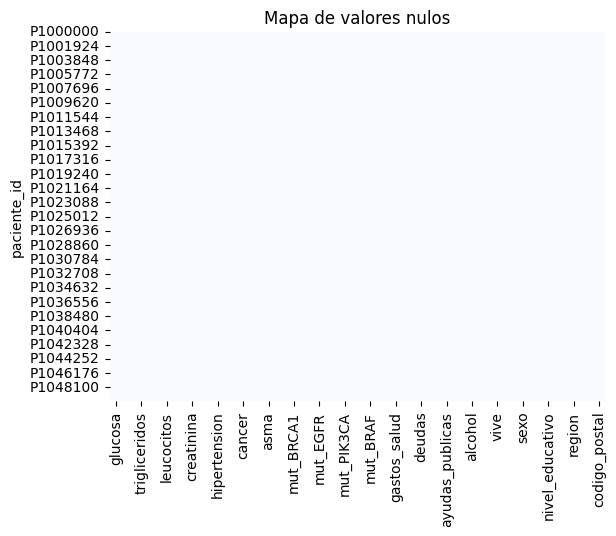

In [78]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Mapa de valores nulos")
plt.show()

El mapa de calor generado permite visualizar de forma rápida la presencia de valores ausentes en el dataset. En este caso, el **heatmap de valores nulos indica que no se detectan celdas vacías en ninguna de las variables analizadas**, lo cual es una excelente señal para la calidad del dataset.

Este resultado sugiere que el conjunto de datos:

* **Está completo** en todas sus observacioneS.
* **No requiere imputación** adicional ni eliminación de registros por ausencia de información.
* **Está listo para continuar con el análisis exploratorio (EDA)** y la fase de feature engineering, al menos en lo relativo a la completitud estructural.

Desde el punto de vista de completitud, el dataset se encuentra en condiciones óptimas para el modelado, aunque debe proseguirse con tareas de limpieza semántica y transformación de formatos.

In [79]:
null_percentage = (df.isnull().sum() / len(df)) * 100 # Porcentaje de valores nulos
null_percentage[null_percentage > 0]

Series([], dtype: float64)

### **Manejo de valores atípicos.**
Los valores atípicos pueden afectar la estabilidad del modelo, distorsionar las predicciones y generar ruido en el análisis. Para detectarlos, utilizamos **boxplots** y aplicamos el método del **rango intercuartil (IQR)**, que nos permite identificar datos extremos en función de su dispersión.

En este análisis, consideramos valores atípicos aquellos que se encuentran **fuera del rango definido entre el percentil 10 (`Q1`) y el percentil 90 (`Q3`)**, ajustando los límites para adaptarnos mejor a la distribución de los datos. Posteriormente, evaluaremos distintas estrategias para su tratamiento.

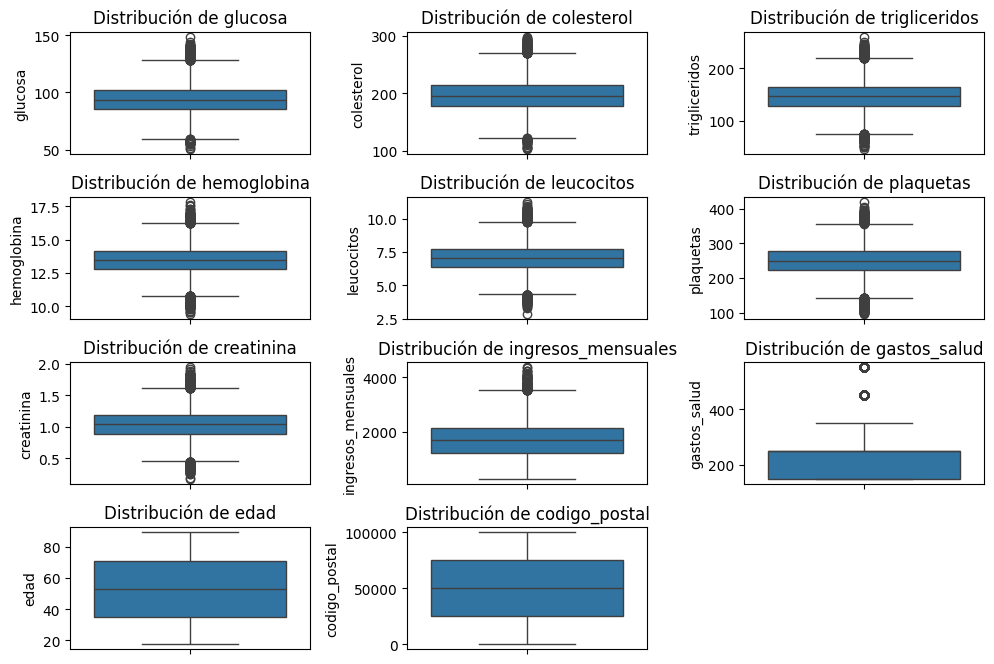

In [80]:
numeric_cols = [
    col for col in df.select_dtypes(include=["number"]).columns # Seleccionar columnas numéricas.
    if df[col].nunique() > 2 # Filtrar columnas no binarias.
]
fig, axes = plt.subplots(nrows=math.ceil(len(numeric_cols) / 2), ncols=3, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)): # Quitar ejes vacíos.
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

El análisis exploratorio mediante boxplots revela la existencia de **valores extremos (outliers)** en varias de las variables numéricas, especialmente en los parámetros bioquímicos (glucosa, colesterol, triglicéridos, plaquetas), ingresos económicos y gastos en salud. Adicionalmente, el número de valores únicos en cada columna confirma que se trata de **variables continuas bien distribuidas**, sin discretización forzada.

Sin embargo, aunque estos valores se alejan visualmente de la mediana, **no deben ser eliminados** del conjunto de datos por las siguientes razones:

1. **Relevancia clínica**: Muchos de estos valores elevados pueden corresponder a pacientes con condiciones reales de alto riesgo (hiperglucemia, hipercolesterolemia, fallo renal, etc.), que son precisamente los casos más valiosos para un modelo de predicción de supervivencia. Su eliminación supondría una pérdida de información crítica.

2. **Ausencia de errores evidentes**: No se detectan valores imposibles o fuera del rango fisiológico humano (como creatinina de 200 o edad negativa), lo que sugiere que los datos son verídicos y no contienen codificaciones erróneas.

3. **Compatibilidad con redes neuronales**: Las redes neuronales son algoritmos capaces de modelar relaciones no lineales y de tolerar cierta variabilidad en los datos. El uso de técnicas como **escalado robusto** (`RobustScaler`) permite neutralizar el impacto desproporcionado de los outliers sin necesidad de eliminarlos.

4. **Riesgo de sesgo por eliminación**: Quitar sistemáticamente los valores extremos puede inducir un sesgo de selección, ocultando casos clínicamente significativos y reduciendo la capacidad del modelo de generalizar ante escenarios reales.

**Conclusión**: Aunque el análisis gráfico muestra valores atípicos, **estos serán conservados** en el dataset, ya que forman parte inherente del fenómeno clínico a modelar. Para evitar que afecten negativamente al entrenamiento, se aplicarán estrategias de preprocesamiento robusto como la **normalización mediante mediana y rango intercuartílico**.

In [81]:
def outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Contar valores atípicos
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        # Eliminar outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df, outliers

A pesar de que se ha decidido **conservar los valores atípicos en la versión principal del dataset**, se propone como medida complementaria la **generación de una versión alternativa (`MONGO00_All_v2`)**, en la que se apliquen transformaciones de limpieza más estrictas, como la **winsorización o el recorte de outliers extremos**. Esta segunda versión permitirá evaluar la sensibilidad del modelo ante distintos tratamientos de los datos y facilitará experimentos comparativos durante la validación. A continuación, se incluye el código correspondiente para aplicar dicho tratamiento de forma controlada, garantizando la trazabilidad de los cambios realizados sobre el dataset original.


In [82]:
'''df, outliers_detectados = outliers_IQR(df, numeric_cols)
print("Valores atípicos detectados:")
for col, count in outliers_detectados.items():
    print(f"- {col}: {count}")'''

'df, outliers_detectados = outliers_IQR(df, numeric_cols)\nprint("Valores atípicos detectados:")\nfor col, count in outliers_detectados.items():\n    print(f"- {col}: {count}")'

In [83]:
df.shape[0] # Filas tras eliminar outliers.

50000

## **Exportación del Dataset Limpio.**
Tras completar estas etapas, hemos asegurado que los datos sean consistentes, limpios y estructurados correctamente. Como siguiente paso, los datos serán almacenados en un formato adecuado, permitiendo futuras consultas, análisis o modelado sin necesidad de repetir el proceso de limpieza.

In [84]:
df.to_csv('../data/cleaned/MONGO00_All_v1.csv')